In [30]:
import pandas as pd #install pandas
import numpy as np #install numpy
from matplotlib import pyplot as plt #insatll pyplot for data visulaization

In [31]:
df = pd.read_csv('Height-Weight Data - Height-Weight Data.csv') #import dataset

In [32]:
df.head() #viewing dataset, 5 rows*columns

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [33]:
df.shape # showing total number of rows and columns

(3501, 2)

Text(0.5, 1.0, 'Scatter plot of individuals weight')

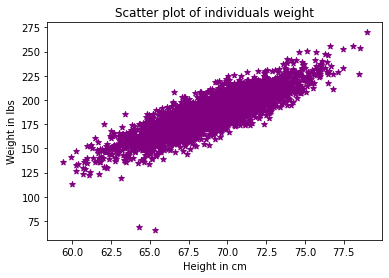

In [34]:
plt.scatter(df.Height , df.Weight, color='purple', marker='*') ##ploting scatter diagram to represent association between Height and Weight
plt.xlabel('Height in cm')
plt.ylabel('Weight in lbs')
plt.title('Scatter plot of individuals weight')

In [35]:
x = df.drop('Weight', axis=1) ##differentiating independent (height) and dependent variable (weight)
y = df[['Weight']]

In [36]:
from sklearn.model_selection import train_test_split ##to seperate training and testing dataset

In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.20, random_state=0) #testing data=20% ## seperate ytrain from xtrain and ytest from xtest

In [38]:
xtrain.head()

,Height
2531,66.560105
3319,69.133081
2761,73.689808
890,68.929672
1572,69.117657


In [39]:
ytrain.head()

,Weight
2531,164.963434
3319,192.172137
2761,228.448827
890,180.826457
1572,197.491802


In [40]:
from sklearn.linear_model import LinearRegression #for linear regression

In [41]:
lr = LinearRegression() ##creat object for linear regression

In [42]:
lr.fit(xtrain, ytrain) # training the model

LinearRegression()

In [43]:
lr.predict([[60]]) #predicted weight for 60cm height

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[133.09455819]])

In [44]:
df['Predicted_Weight'] = lr.predict(x) ##prediction of weight
df.head()

,Height,Weight,Predicted_Weight
0,73.847017,241.893563,215.567289
1,68.781904,162.310473,185.399514
2,74.110105,212.740856,217.134241
3,71.730978,220.042470,202.964178
4,69.881796,206.349801,191.950461


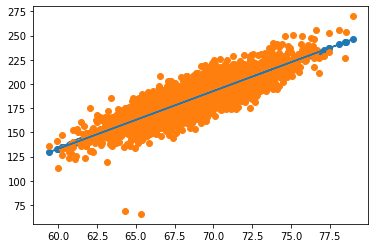

In [45]:
plt.plot(x, df[['Predicted_Weight']])      # plt.plot(x.squeeze(), df[['predicted_rent']])
plt.scatter(x, df[['Predicted_Weight']])
plt.scatter(x, df[['Weight']]) ##best fitted line

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error ##measures of error

In [47]:
mse = mean_squared_error(ytest, lr.predict(xtest)) #mean squared error
mae = mean_absolute_error(ytest, lr.predict(xtest)) #mean absolute error

In [48]:
mse

106.5829756910518

In [49]:
mae

8.298701175200339

In [50]:
lr.score(xtest, ytest) #model accuracy

0.7374288112748553